In [74]:
%matplotlib inline
from syk_susy_2 import *
import numpy as np
from numpy import linalg as LA
import scipy.linalg as SLA
import matplotlib.pyplot as plt
import manipulate
from importlib import reload
reload(manipulate)
import math

In [2]:
H = hamiltonian(9,1)
w, v = manipulate.eigen(H)

In [3]:
w = manipulate.set_zeros(w)
Ha = manipulate.reconstruct(w,v)
print(np.min(Ha-H))

(-8.881784197e-15-3.46944695195e-17j)


In [4]:
ngs = sum(w==0)
tot_gs = np.copy(v[:,0])
for i in range(1,ngs):
    tot_gs += v[:,i]
tot_gs = tot_gs/math.sqrt(ngs)
# print(tot_gs)

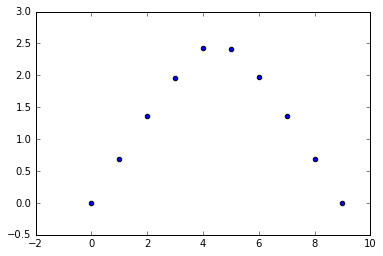

In [31]:
rho = manipulate.density_mat(tot_gs)
entropies = np.zeros(10)
rhoi = np.copy(rho)
for idx, val in enumerate(entropies):
    if idx != 0: rhoi = manipulate.single_trace(rhoi)
    entropies[idx] = manipulate.entropy(rhoi)
np.savetxt("../data/N%sentropy" % 9, np.transpose(entropies))
plt.scatter(range(10), entropies)

In [14]:
entropies[4]

nan

For different values of $N$

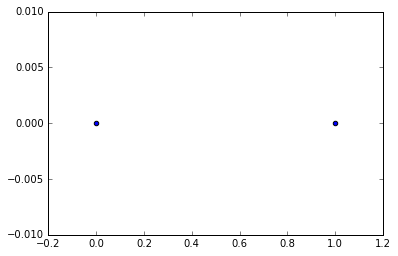

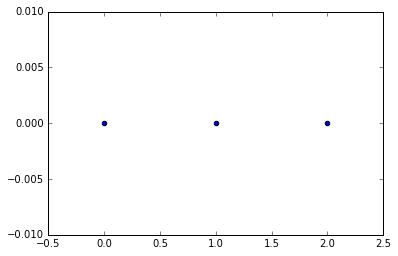

N =  2 entropy[2] =  -0.0


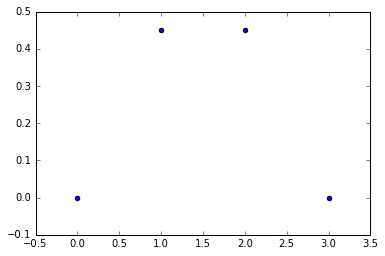

N =  3 entropy[2] =  0.450561208866


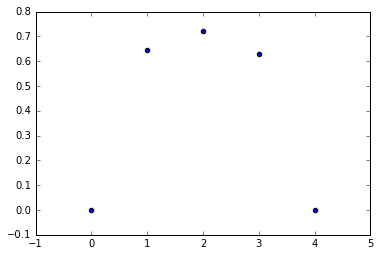

N =  4 entropy[2] =  0.720183942707


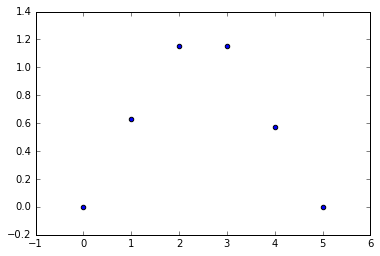

N =  5 entropy[2] =  1.15447056372


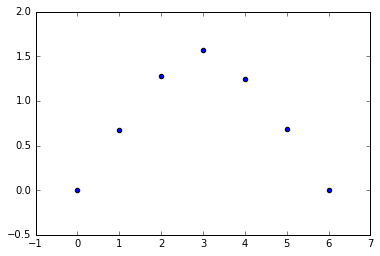

N =  6 entropy[2] =  1.27642672076


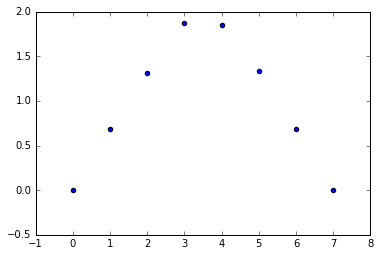

N =  7 entropy[2] =  1.31715035475


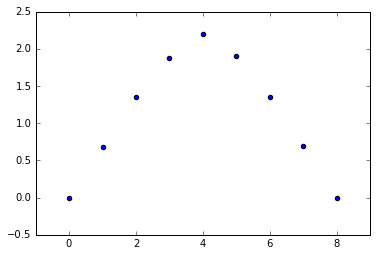

N =  8 entropy[2] =  1.34587169151


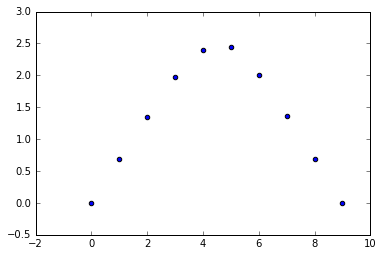

N =  9 entropy[2] =  1.34999786034


In [34]:
for N in [1,2,3,4,5,6,7,8,9]:
    H = hamiltonian(N,1)
    w, v = manipulate.eigen(H)
    w = manipulate.set_zeros(w)
    ngs = sum(w==0)
    tot_gs = np.copy(v[:,0])
    for i in range(1,ngs):
        tot_gs += v[:,i]
    tot_gs = tot_gs/math.sqrt(ngs)
    rho = manipulate.density_mat(tot_gs)
    entropies = np.zeros(N+1)
    rhoi = np.copy(rho)
    for idx, val in enumerate(entropies):
        if idx != 0: rhoi = manipulate.single_trace(rhoi)
        entropies[idx] = manipulate.entropy(rhoi)
    plt.scatter(range(N+1), entropies)
    np.savetxt("../data/N0%sentropy.txt" % N, np.transpose(entropies))
    plt.savefig("../data/entropy0%s.pdf" % N)
    plt.show()
    if N>1: print("N = ", N, "entropy[2] = ", entropies[2])

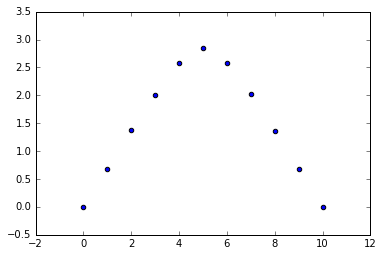

N =  10 entropy[2] =  1.37229969721


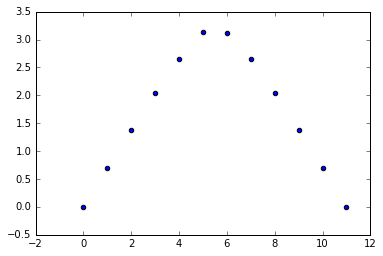

N =  11 entropy[2] =  1.37567251584


In [35]:
for N in [10, 11]:
    H = hamiltonian(N,1)
    w, v = manipulate.eigen(H)
    w = manipulate.set_zeros(w)
    ngs = sum(w==0)
    tot_gs = np.copy(v[:,0])
    for i in range(1,ngs):
        tot_gs += v[:,i]
    tot_gs = tot_gs/math.sqrt(ngs)
    rho = manipulate.density_mat(tot_gs)
    entropies = np.zeros(N+1)
    rhoi = np.copy(rho)
    for idx, val in enumerate(entropies):
        if idx != 0: rhoi = manipulate.single_trace(rhoi)
        entropies[idx] = manipulate.entropy(rhoi)
    plt.scatter(range(N+1), entropies)
    np.savetxt("../data/N%sentropy.txt" % N, np.transpose(entropies))
    plt.savefig("../data/entropy%s.pdf" % N)
    plt.show()
    if N>1: print("N = ", N, "entropy[2] = ", entropies[2])

Getting average values

In [54]:
N = 10
entropy = np.zeros(N+1)
I = 10
for i in range(I):
    H = hamiltonian(N,1)
    w, v = manipulate.eigen(H)
    w = manipulate.set_zeros(w)
    ngs = sum(w==0)
    tot_gs = np.copy(v[:,0])
    for i in range(1,ngs):
        tot_gs += v[:,i]
    tot_gs = tot_gs/math.sqrt(ngs)
    rho = manipulate.density_mat(tot_gs)
    entropies = np.zeros(N+1)
    rhoi = np.copy(rho)
    for idx, val in enumerate(entropies):
        if idx != 0: rhoi = manipulate.single_trace(rhoi)
        entropies[idx] = manipulate.entropy(rhoi)
    entropy = entropy + entropies
np.savetxt("../data/N0%savg_entropy.txt" % N, np.transpose(entropy/I))

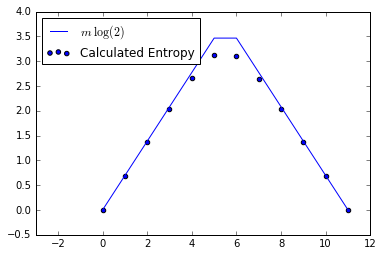

In [138]:
actual = np.transpose(np.loadtxt("../data/N11entropy.txt"))
l = len(actual)
predic = np.zeros(l)
for i in range(int(l/2)):
    predic[i] = np.log(2)*i
    predic[l-1-i] = np.log(2)*i
plt.plot(range(l), predic, label=r"$m\;\log(2)$")
plt.scatter(range(l), actual, label="Calculated Entropy")
plt.xlim(-3,12)
plt.legend(loc=2)
plt.savefig('../data/N11pred_ent.pdf')

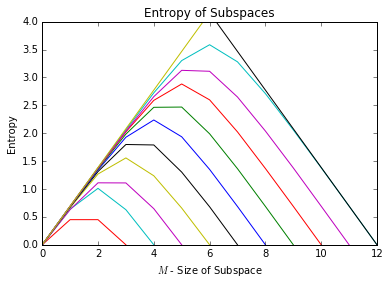

In [126]:
plt.figure()
for N in [1,2,3,4,5,6,7,8,9,10,12]:
    data = np.transpose(np.loadtxt("../data/N%02davg_entropy.txt" % N))
#     plt.plot(np.arange(len(data))-N/2, data)
    plt.plot(np.arange(len(data)), data)
# plt.plot(np.arange(12)-11/2, np.transpose(np.loadtxt("../data/N11entropy.txt")))
plt.plot(np.arange(12), np.transpose(np.loadtxt("../data/N11entropy.txt")))
plt.plot(np.arange(7), np.log(2)*np.arange(7))
plt.plot(np.arange(7)+6, np.log(2)*(6-np.arange(7)))
plt.ylim(0,4)
plt.title("Entropy of Subspaces")
plt.xlabel("$M$ - Size of Subspace")
plt.ylabel("Entropy")
plt.savefig("../data/allentropy.pdf")
plt.show()

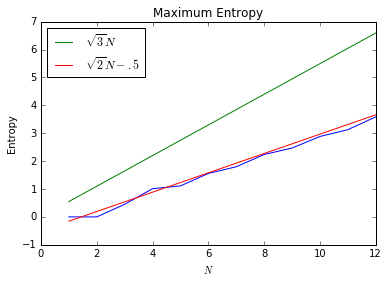

In [147]:
plt.figure()
maxentropies = np.zeros(12)
idxs = np.arange(12)+1
for N in [1,2,3,4,5,6,7,8,9,10,12]:
    data = np.transpose(np.loadtxt("../data/N%02davg_entropy.txt" % N))
#     plt.plot(np.arange(len(data))-N/2, data)
    maxentropies[N-1] = np.max(data)
# plt.plot(np.arange(12)-11/2, np.transpose(np.loadtxt("../data/N11entropy.txt")))
maxentropies[11-1] =  np.max(np.loadtxt("../data/N11entropy.txt"))
plt.plot(idxs, maxentropies)
plt.plot(idxs, np.log(np.sqrt(3))*idxs, label="$\sqrt{3}N$")
plt.plot(idxs, np.log(np.sqrt(2))*idxs - .5, label="$\sqrt{2}N-.5$")
plt.title("Maximum Entropy")
plt.xlabel("$N$")
plt.ylabel("Entropy")
plt.legend(loc=2)
plt.savefig("../data/maxentropy.pdf")
plt.show()

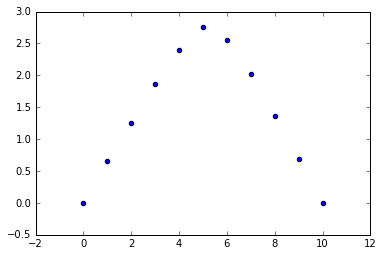

In [145]:
rho = manipulate.density_mat(v[ngs+10])
entropies = np.zeros(11)
rhoi = np.copy(rho)
for idx, val in enumerate(entropies):
    if idx != 0: rhoi = manipulate.single_trace(rhoi)
    entropies[idx] = manipulate.entropy(rhoi)
np.savetxt("../data/N%sentropy" % 9, np.transpose(entropies))
plt.scatter(range(11), entropies)

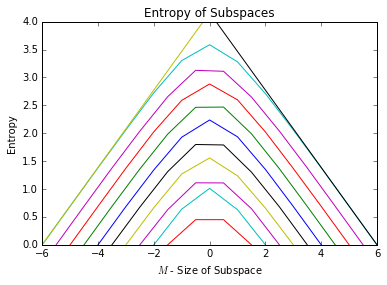

In [140]:
plt.figure()
for N in [1,2,3,4,5,6,7,8,9,10,12]:
    data = np.transpose(np.loadtxt("../data/N%02davg_entropy.txt" % N))
    plt.plot(np.arange(len(data))-N/2, data)
#     plt.plot(np.arange(len(data)), data)
plt.plot(np.arange(12)-11/2, np.transpose(np.loadtxt("../data/N11entropy.txt")))
# plt.plot(np.arange(12), np.transpose(np.loadtxt("../data/N11entropy.txt")))
plt.plot(np.arange(7)-6, np.log(2)*np.arange(7))
plt.plot(np.arange(7), np.log(2)*(6-np.arange(7)))
plt.ylim(0,4)
plt.title("Entropy of Subspaces")
plt.xlabel("$M$ - Size of Subspace")
plt.ylabel("Entropy")
plt.savefig("../data/rainbow.pdf")
plt.show()

In [101]:
ngs

324

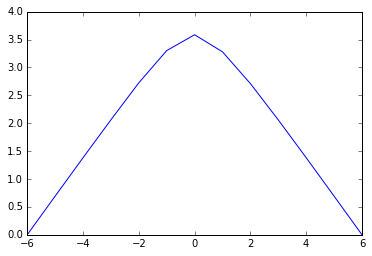

In [115]:
data = np.loadtxt("../data/N12avg_entropy.txt")
l = len(data)
plt.plot(np.arange(l)-(l-1)/2, np.transpose(data))

In [116]:
np.log(2)

0.69314718055994529